# Hand Gesture Classification


## Imports

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import random
px.defaults.color_discrete_sequence = px.colors.qualitative.Bold

## Data Loading and Exploration

In [7]:
df = pd.read_csv(r'../data/hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [11]:
df.shape

(25675, 64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [62]:
labels = df['label'].unique()
labels_freq = df['label'].value_counts().to_list()
fig = px.bar(x=labels, y=labels_freq, labels='freq')
fig.update_layout(
    xaxis_title="Gesture Label",
    yaxis_title="Frequency"
)
fig.update_traces(
    hovertemplate="Label: %{x}<br>Frequency: %{y}<extra></extra>"
)
fig.update_traces(opacity=0.7)
fig.show()

In [63]:
print(f"There are {len(labels)} Classes")

There are 18 Classes


### 2D Gestures visualization

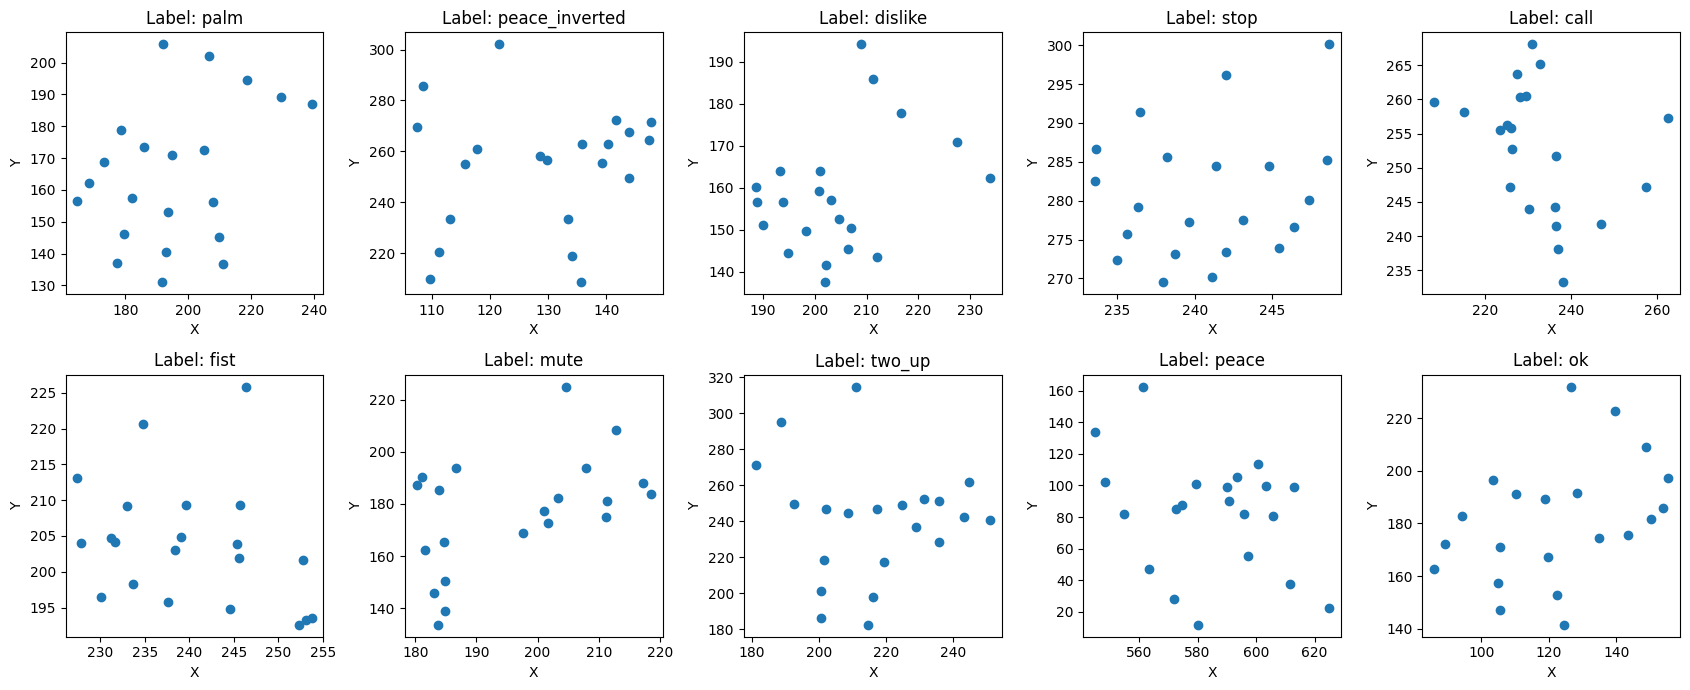

In [117]:
import random
import matplotlib.pyplot as plt
import numpy as np

rand_labels = random.sample(population=labels.tolist(), k=10)
samples = []

# Set figure size first
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(17, 7))

for i, label in enumerate(rand_labels):
    # Select first record for the current label
    sample = df[df["label"] == label].iloc[0][:-1].to_numpy(dtype=float)
    samples.append(sample)

samples = np.array(samples)
samples = samples.reshape((10, 21, 3))  # (num_samples, num_points, xyz)

for idx, record in enumerate(samples):
    x = record[:, 0]
    y = record[:, 1]
    z = record[:, 2]
    
    row = idx // 5
    col = idx % 5
    axs[row, col].scatter(x, y)
    axs[row, col].set_title(f"Label: {rand_labels[idx]}")
    axs[row, col].set_xlabel("X")
    axs[row, col].set_ylabel("Y")

plt.tight_layout()
plt.show()

### 3D Gestures visualization

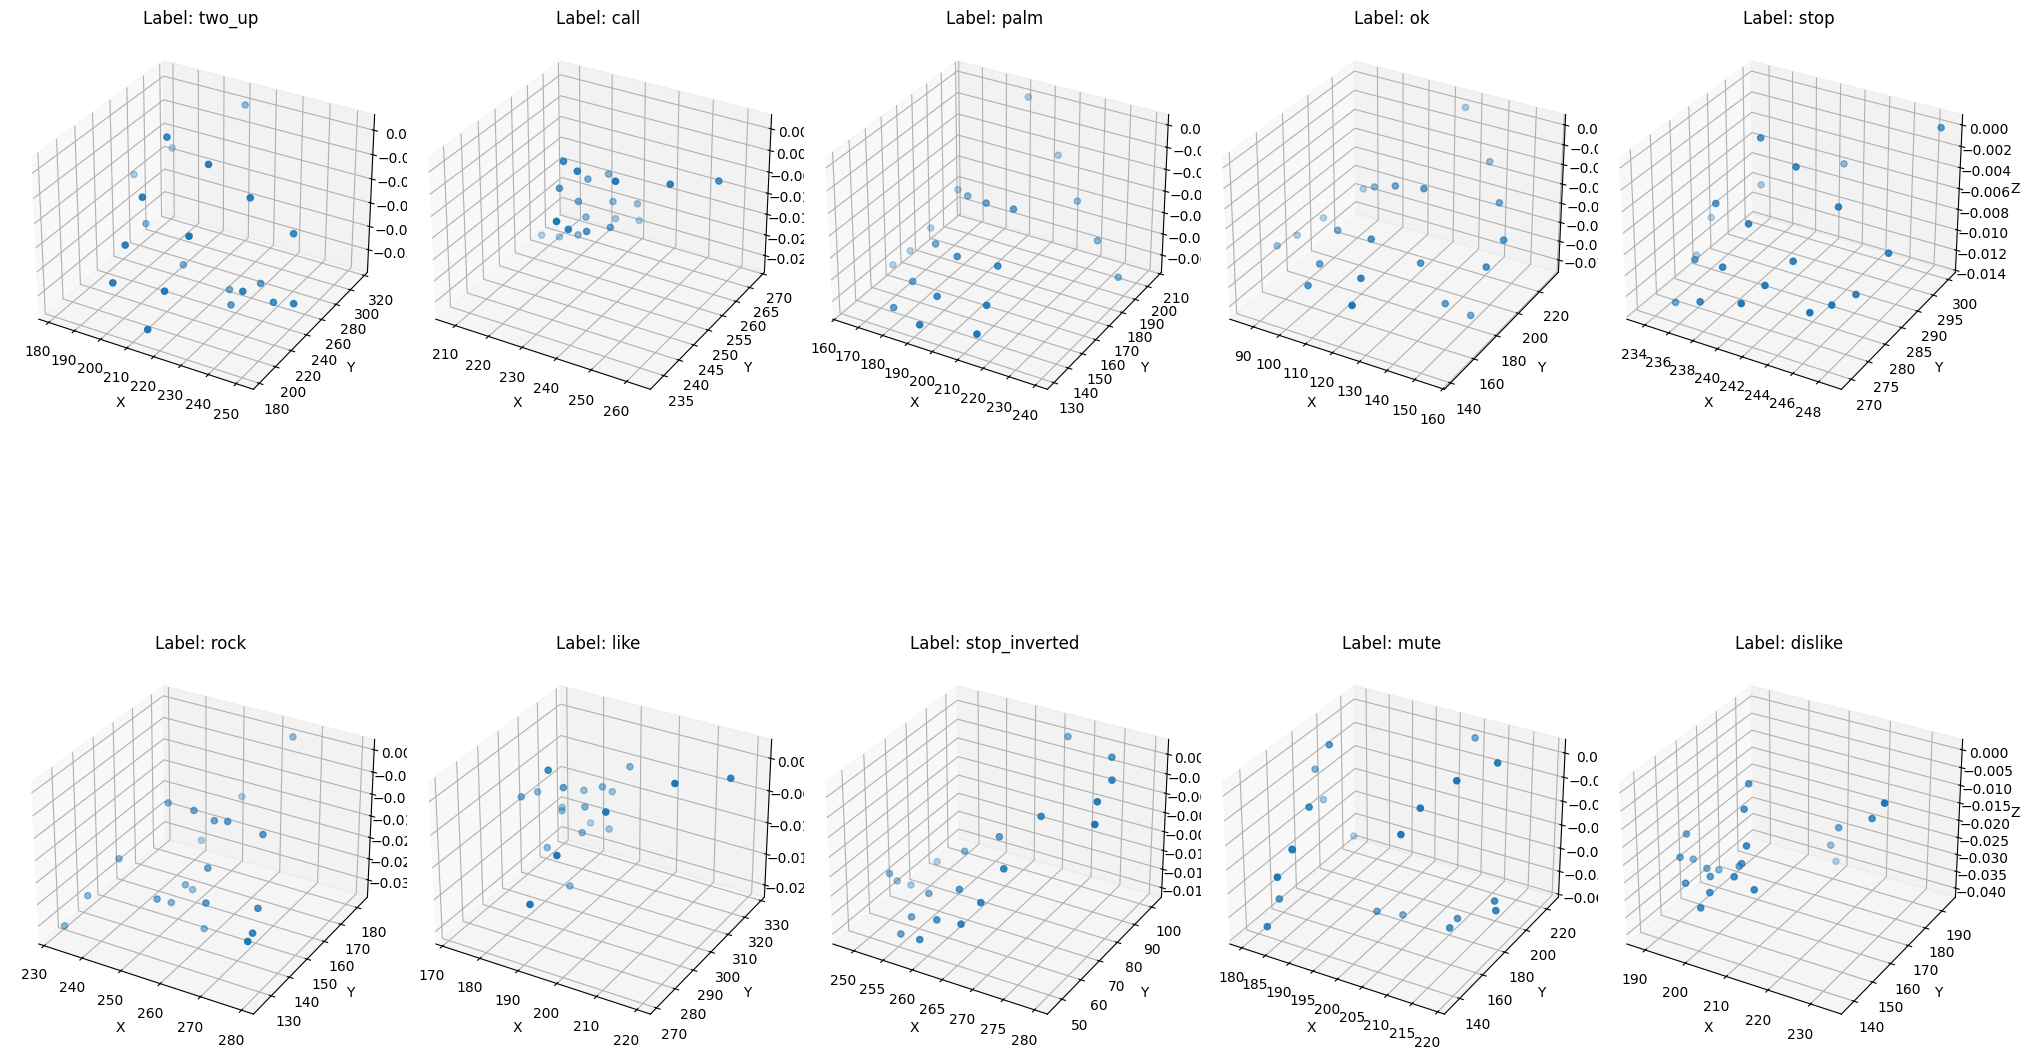

In [118]:
import random
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

rand_labels = random.sample(population=labels.tolist(), k=10)
samples = []

# Select first record for each random label
for label in rand_labels:
    sample = df[df["label"] == label].iloc[0][:-1].to_numpy(dtype=float)
    samples.append(sample)

samples = np.array(samples)
samples = samples.reshape((10, 21, 3))  # (num_samples, num_points, xyz)

# Create subplots
fig = plt.figure(figsize=(20, 15))

for idx, record in enumerate(samples):
    ax = fig.add_subplot(2, 5, idx + 1, projection='3d')  # 2 rows, 5 cols
    x = record[:, 0]
    y = record[:, 1]
    z = record[:, 2]
    
    ax.scatter(x, y, z)
    ax.set_title(f"Label: {rand_labels[idx]}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.tight_layout()
plt.show()